In [1]:
import pandas as pd
import numpy as np 
import os
import glob


#path = './tripdata/'
extension = 'csv'
#os.chdir(path)
csv_list = glob.glob('*.{}'.format(extension))
print(csv_list)

['yr_2020.csv', 'timeseries.csv', 'yr_2018.csv', 'yr_2019.csv', 'revenuets.csv', 'yr_2014.csv', 'forecast_revenue.csv', 'yr_2015.csv', 'yr_2017.csv', 'revenuetimesseries.csv', 'yr_2016.csv', 'yr_2013.csv']


In [2]:
df_list = []

for csv_file in csv_list:
    df_temp = pd.read_csv(csv_file,\
                  dtype={"tripduration":int,\
                  "starttime":object,\
                  "stoptime":object,\
                  "start_station_id":float,\
                  "start_station_name":object,\
                  "start_station_latitude":float,\
                  "start_station_longitude":float,\
                  "end_station_id":float,\
                  "end_station_name":object,\
                  "end_station_latitude":float,\
                  "end_station_longitude":float,\
                  "bikeid":int,\
                  "usertype":object,\
                  "birth_year":object,\
                  "gender":int,\
                  "counter":int,\
                  "year":int,\
                  "age":int})
    
    df_list.append(df_temp)

df_all = pd.concat(df_list)

In [3]:
def clean(dataframe):
    
    # remove trips that are longer than 1 hour 
    #dataframe = dataframe.loc[dataframe['tripduration']<= 60*60]
    
    #remove longitude and latitude outside of New York area 
    dataframe = dataframe.loc[(dataframe['start_station_latitude']>40) & (dataframe['start_station_latitude']<41)] 
    dataframe = dataframe.loc[(dataframe['end_station_longitude']>-74.5) & (dataframe['end_station_longitude']<-73.5)]
    
    #converting time to date time for pandas
    dataframe['start_time'] = pd.to_datetime(dataframe['starttime'])
    dataframe['stop_time'] = pd.to_datetime( dataframe['stoptime'])
    
    #drop missing end lat and long
    #dataframe = dataframe.dropna(subset=['end_station_latitude', 'end_station_latitude'])
    #dataframe = dataframe.dropna(subset=['start_station_id', 'start_station_name',\
    #                                    'end_station_id','end_station_name'])
    
    #imputes missing birth year
    
    return dataframe

In [4]:
def newfeatures(data_frame):

    #start time variables 
    data_frame['year'] = data_frame['start_time'].dt.year
    
    #defining months
    data_frame['month'] = data_frame['start_time'].dt.month
    data_frame.loc[data_frame['month'] == 1, ['month']] = 'January'
    data_frame.loc[data_frame['month'] == 2, ['month']] = 'February'
    data_frame.loc[data_frame['month'] == 3, ['month']] = 'March'
    data_frame.loc[data_frame['month'] == 4, ['month']] = 'April'
    data_frame.loc[data_frame['month'] == 5, ['month']] = 'May'
    data_frame.loc[data_frame['month'] == 6, ['month']] = 'June'
    data_frame.loc[data_frame['month'] == 7, ['month']] = 'July'
    data_frame.loc[data_frame['month'] == 8, ['month']] = 'August'
    data_frame.loc[data_frame['month'] == 9, ['month']] = 'September'
    data_frame.loc[data_frame['month'] == 10, ['month']] = 'October'
    data_frame.loc[data_frame['month'] == 11, ['month']] = 'November'
    data_frame.loc[data_frame['month'] == 12, ['month']] = 'December'
    
    
    data_frame['start_date'] = data_frame['start_time'].dt.date
    data_frame['time_of_day'] = data_frame['start_time'].dt.time
    data_frame['hour_of_day'] = data_frame['start_time'].dt.hour #0 to 23 
    
    #defining days of the week and weekend 
    data_frame['week_day'] = data_frame['start_time'].dt.weekday #0 to 7 
    data_frame['weekend'] = [1 if 5<=x<=6 else 0 for x in data_frame['week_day']]
    data_frame.loc[data_frame['week_day'] == 0, ['week_day']] = 'Monday'
    data_frame.loc[data_frame['week_day'] == 1, ['week_day']] = 'Tuesday'
    data_frame.loc[data_frame['week_day'] == 2, ['week_day']] = 'Wednesday'
    data_frame.loc[data_frame['week_day'] == 3, ['week_day']] = 'Thursday'
    data_frame.loc[data_frame['week_day'] == 4, ['week_day']] = 'Friday'
    data_frame.loc[data_frame['week_day'] == 5, ['week_day']] = 'Saturday'
    data_frame.loc[data_frame['week_day'] == 6, ['week_day']] = 'Sunday'

    
    #stop time variables 
    data_frame['stop_date'] = data_frame['stop_time'].dt.date
    data_frame['stop_hour'] = data_frame['stop_time'].dt.hour
    data_frame['end_time_of_day'] = data_frame['stop_time'].dt.time

    return data_frame

In [5]:
df_use=clean(df_all)
df_use=newfeatures(df_use)
df_use.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_time,stop_time,month,time_of_day,hour_of_day,week_day,weekend,stop_date,stop_hour,end_time_of_day
0,114.0,2020-01-01 00:03:49.8380,2020-01-01 00:05:44.1390,274.0,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,416.0,Cumberland St & Lafayette Ave,40.687534,...,2020-01-01 00:03:49.838,2020-01-01 00:05:44.139,January,00:03:49.838000,0,Wednesday,0,2020-01-01,0,00:05:44.139000
1,292.0,2020-01-01 00:11:00.4800,2020-01-01 00:15:53.0220,517.0,Pershing Square South,40.751581,-73.977910,472.0,E 32 St & Park Ave,40.745712,...,2020-01-01 00:11:00.480,2020-01-01 00:15:53.022,January,00:11:00.480000,0,Wednesday,0,2020-01-01,0,00:15:53.022000
2,339.0,2020-01-01 00:15:48.5240,2020-01-01 00:21:27.8310,3366.0,West End Ave & W 107 St,40.802117,-73.968181,3553.0,Frederick Douglass Blvd & W 112 St,40.801694,...,2020-01-01 00:15:48.524,2020-01-01 00:21:27.831,January,00:15:48.524000,0,Wednesday,0,2020-01-01,0,00:21:27.831000
3,768.0,2020-01-01 00:15:52.4530,2020-01-01 00:28:41.4110,504.0,1 Ave & E 16 St,40.732219,-73.981656,487.0,E 20 St & FDR Drive,40.733143,...,2020-01-01 00:15:52.453,2020-01-01 00:28:41.411,January,00:15:52.453000,0,Wednesday,0,2020-01-01,0,00:28:41.411000
4,1010.0,2020-01-01 00:15:53.6310,2020-01-01 00:32:44.5320,3143.0,5 Ave & E 78 St,40.776321,-73.964274,3168.0,Central Park West & W 85 St,40.784727,...,2020-01-01 00:15:53.631,2020-01-01 00:32:44.532,January,00:15:53.631000,0,Wednesday,0,2020-01-01,0,00:32:44.532000


In [25]:
#testshiny=df_use[['year','month','start_station_name','start_station_latitude','start_station_longitude','counter']]\
#.groupby(['year','month','start_station_name','start_station_latitude','start_station_longitude'])\
#.sum().reset_index()

In [26]:
#testshiny.to_csv('testshiny.csv', index = False)

In [6]:
df_use['uniqueroute'] = df_use['start_station_name'] + df_use['end_station_name'] 

In [9]:
df_2019=df_use[df_use['year']==2019]

In [73]:
df_2019_routes=df_2019[['week_day','hour_of_day','uniqueroute','start_station_name','end_station_name',\
         'start_station_latitude','start_station_longitude','end_station_latitude',\
                        'end_station_longitude','counter']]\
.groupby(['week_day','hour_of_day','uniqueroute','start_station_name','end_station_name',\
'start_station_latitude','start_station_longitude','end_station_latitude',\
          'end_station_longitude'])\
.sum().reset_index()

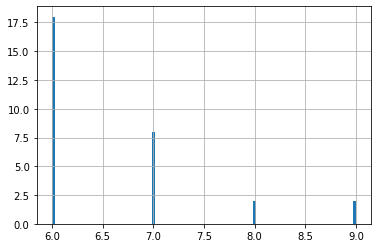

In [70]:
df_2019_routes['counter'][df_2019_routes['counter']>5].hist(bins=100)

In [74]:
len(df_2019_routes)

896283

In [68]:
df_2019_routes[df_2019_routes['counter']>5].drop_duplicates()

,month,week_day,hour_of_day,uniqueroute,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,counter
109290,August,Monday,8,Hamilton ParkGrove St PATH,Hamilton Park,Grove St PATH,40.727596,-74.044247,40.719586,-74.043117,6.0
119175,August,Monday,18,W 26 St & 10 AveW 26 St & 8 Ave,W 26 St & 10 Ave,W 26 St & 8 Ave,40.749718,-74.002950,40.747348,-73.997236,6.0
127048,August,Saturday,11,E 24 St & Park Ave SCentre St & Chambers St,E 24 St & Park Ave S,Centre St & Chambers St,40.740964,-73.986022,40.712733,-74.004607,6.0
129146,August,Saturday,12,Soissons LandingSoissons Landing,Soissons Landing,Soissons Landing,40.692317,-74.014866,40.692317,-74.014866,6.0
130437,August,Saturday,13,Picnic PointSoissons Landing,Picnic Point,Soissons Landing,40.685126,-74.025353,40.692317,-74.014866,6.0
133358,August,Saturday,15,Soissons LandingSoissons Landing,Soissons Landing,Soissons Landing,40.692317,-74.014866,40.692317,-74.014866,6.0
159478,August,Thursday,9,W 26 St & 8 AveW 26 St & 10 Ave,W 26 St & 8 Ave,W 26 St & 10 Ave,40.747348,-73.997236,40.749718,-74.002950,7.0
193147,August,Wednesday,8,Hamilton ParkGrove St PATH,Hamilton Park,Grove St PATH,40.727596,-74.044247,40.719586,-74.043117,9.0
364224,July,Monday,7,Vesey Pl & River TerraceNorth Moore St & Green...,Vesey Pl & River Terrace,North Moore St & Greenwich St,40.715338,-74.016584,40.720195,-74.010301,7.0
364767,July,Monday,8,Brunswick & 6thGrove St PATH,Brunswick & 6th,Grove St PATH,40.726012,-74.050389,40.719586,-74.043117,6.0


In [67]:
df_2019_routes.to_csv('test.csv')